https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python?resource=download

https://www.youtube.com/watch?v=1RDyVAoFKgY <br/>
https://www.youtube.com/watch?v=C3r7tGRe2eI&t=200s

In [64]:
import pandas as pd
import matplotlib.pyplot as plt

In [111]:
df = pd.read_csv('Mall_Customers.csv')

In [112]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# EDA

In [113]:
df.drop(['CustomerID'],axis=1,inplace=True)

In [114]:
df.isnull().sum()

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


In [117]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [118]:
catogorical_features =[i for i in df.columns if df[i].dtype == 'O']
numerical_features =[i for i in df.columns if df[i].dtype != 'O']

In [119]:
for i in catogorical_features:
    print(i," feature has : ",len(df[i].unique()))

Gender  feature has :  2


In [120]:
def make_dict(list):
    dict = {}
    count=1
    for i in list:
        dict[i] = count
        count+=1
    return dict

In [121]:
for i in catogorical_features:
    dict = make_dict(df[i].unique())
    df[i] = df[i].map(dict)

In [122]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,2,20,16,6
3,2,23,16,77
4,2,31,17,40


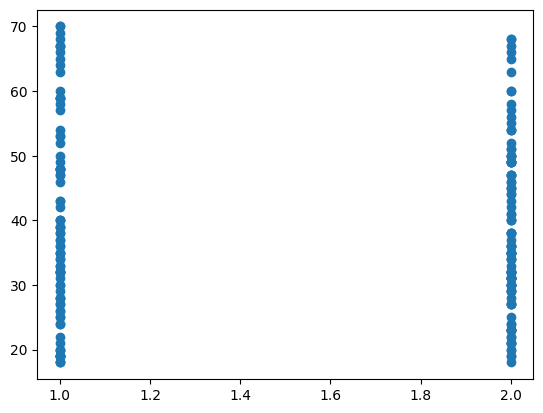

In [123]:
plt.scatter(df['Gender'],df['Age'])

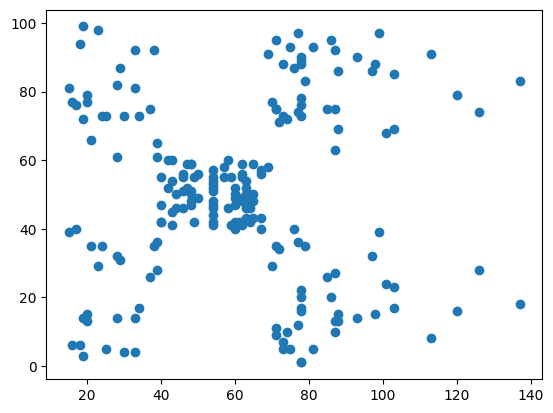

In [124]:
plt.scatter(df['Annual Income (k$)'],df['Spending Score (1-100)'])

# feature selection

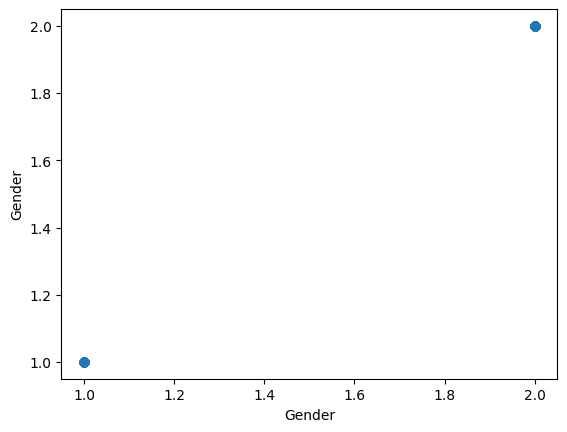

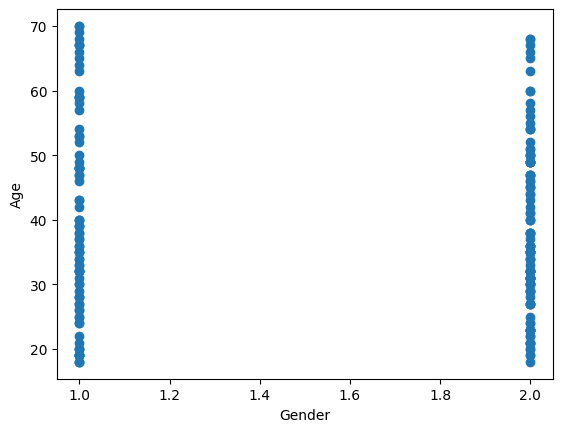

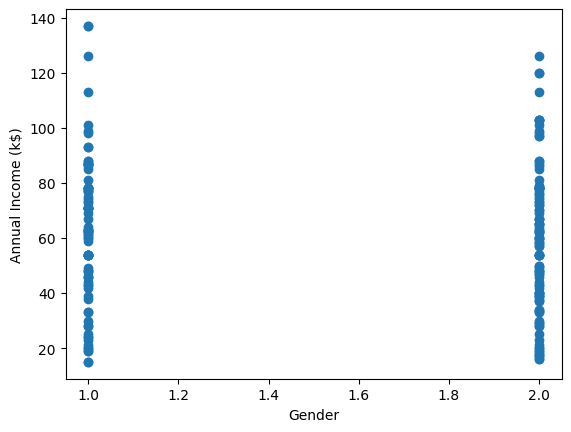

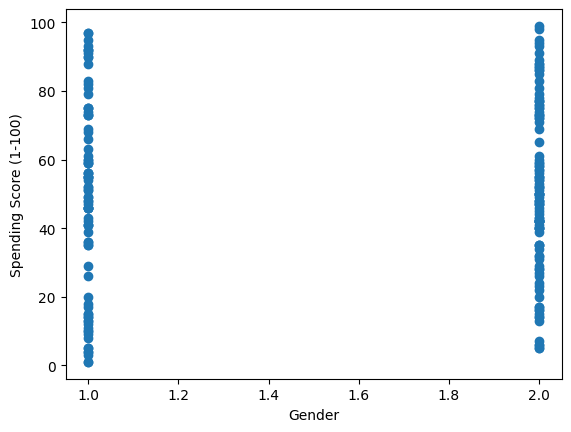

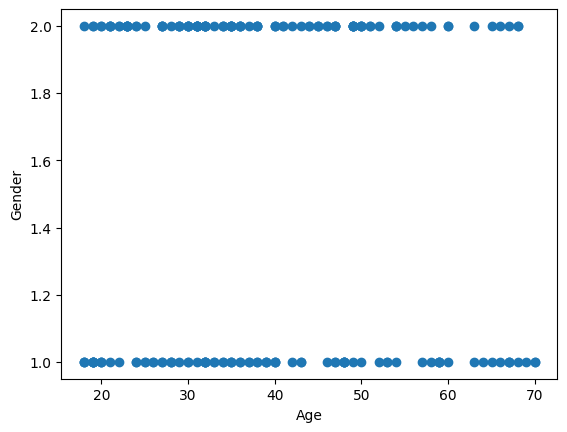

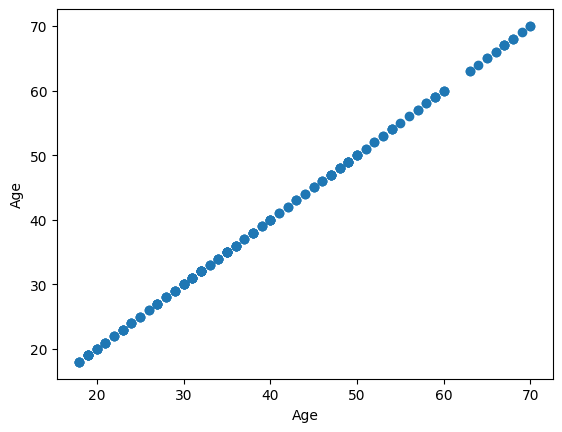

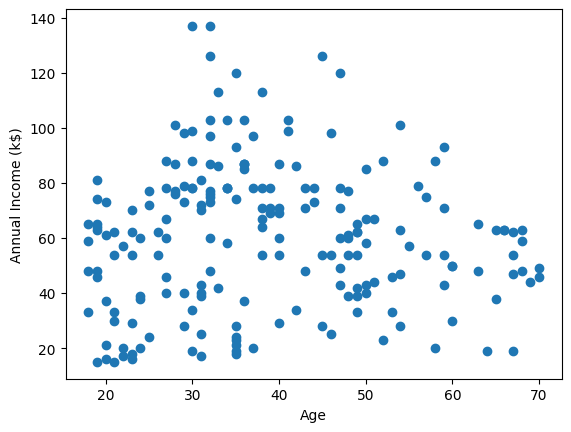

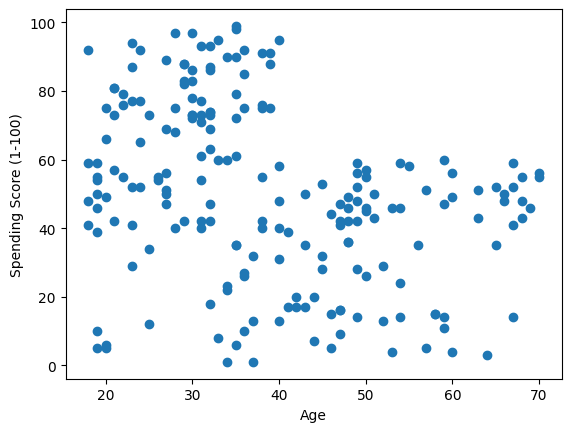

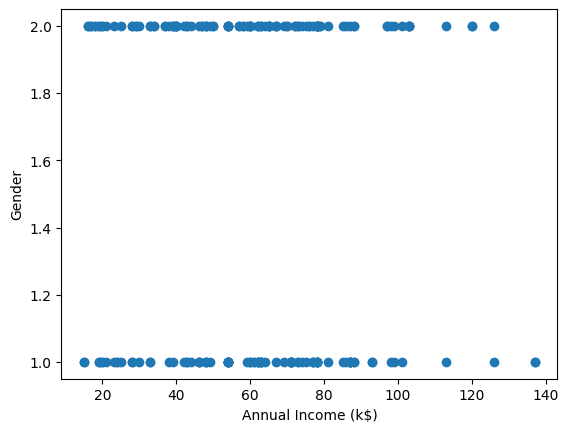

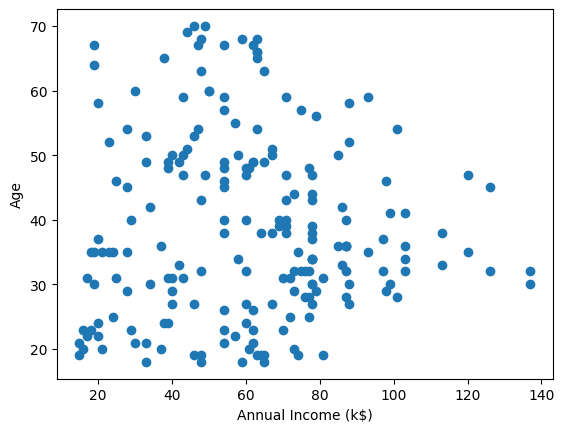

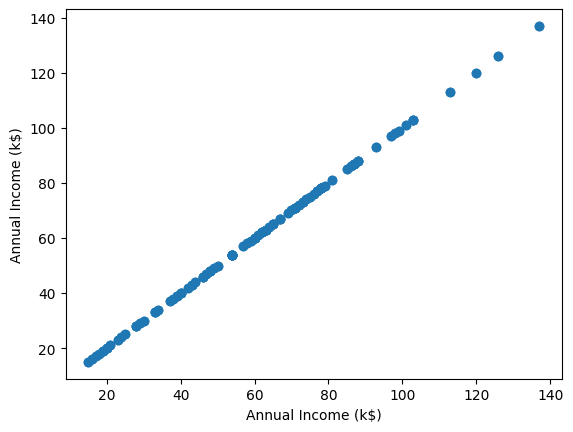

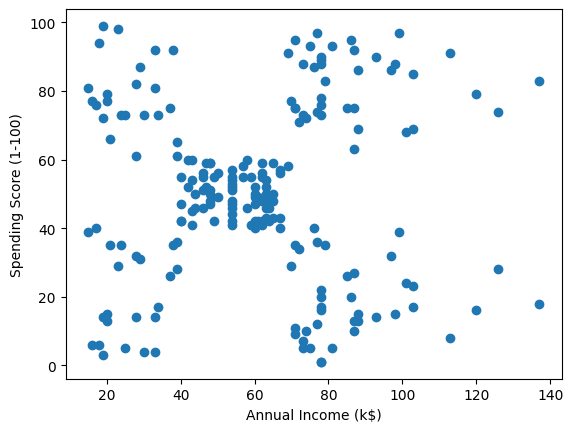

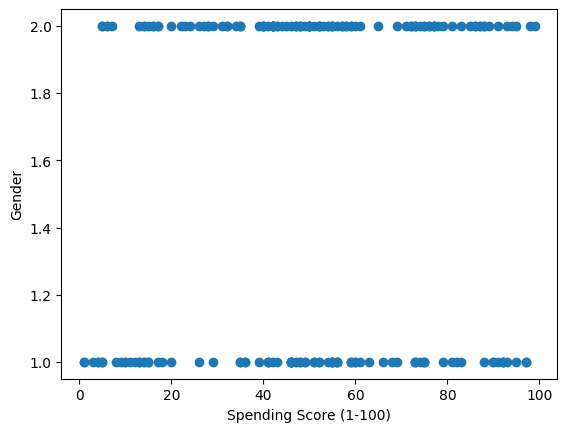

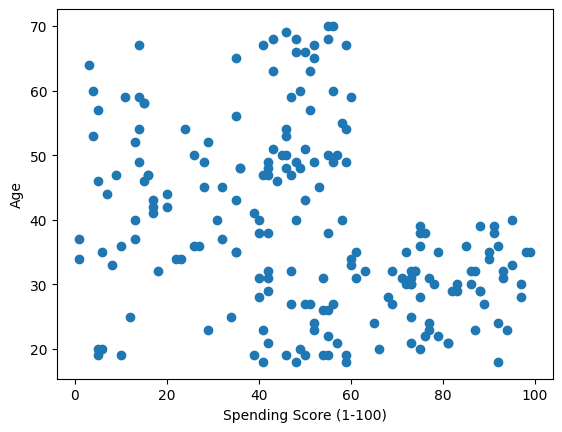

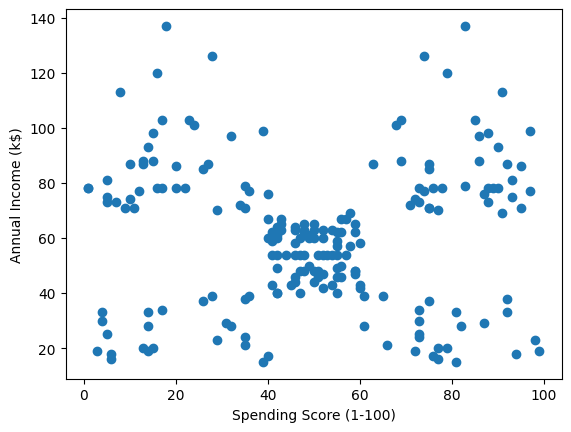

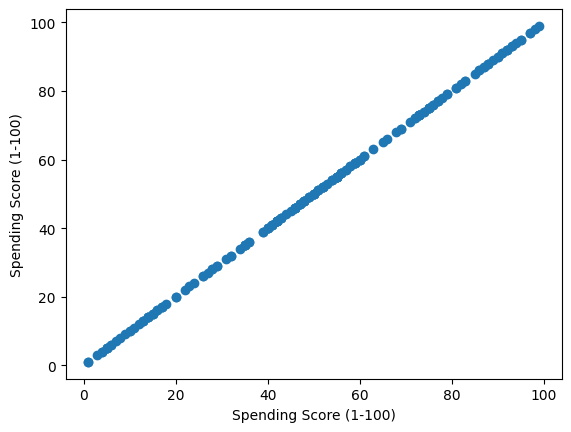

In [125]:
for i in df.columns:
    for j in df.columns:
        plt.scatter(df[i],df[j])
        plt.xlabel(i)
        plt.ylabel(j)
        plt.show()

In [126]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,2,20,16,6
3,2,23,16,77
4,2,31,17,40


In [127]:
x = df[['Age','Annual Income (k$)','Spending Score (1-100)']]

In [128]:
x.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


In [129]:
from sklearn.cluster import DBSCAN

In [135]:
db = DBSCAN(eps = 10 , min_samples = 5 , metric = 'euclidean',n_jobs=-1)
labels = db.fit_predict(x)

In [136]:
labels

array([-1,  0, -1,  0, -1,  0, -1, -1, -1,  0, -1, -1, -1,  0, -1,  0, -1,
        0, -1, -1, -1,  0, -1,  0, -1,  0, -1, -1, -1,  0, -1,  0, -1, -1,
       -1,  0, -1,  0, -1,  0, -1, -1,  1,  1, -1, -1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1, -1,  2, -1,  2,  1,  2, -1,  2, -1,  2, -1,  2, -1,  2,
       -1,  2, -1,  2, -1,  2, -1,  2, -1,  2, -1,  2, -1,  2,  3,  2,  3,
        2, -1,  2, -1,  2, -1,  2, -1,  2, -1,  2, -1,  2,  3,  2,  3, -1,
        3,  2, -1,  2, -1,  2, -1,  2, -1,  2, -1,  2, -1,  2, -1,  2, -1,
       -1, -1,  2, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], dtype=int64)

In [139]:
x['clusters'] = labels
x['clusters'].unique()

array([-1,  0,  1,  2,  3], dtype=int64)

In [140]:
x['clusters'].value_counts()

 1    79
-1    69
 2    32
 0    15
 3     5
Name: clusters, dtype: int64

In [141]:
non_cluster = x[x['clusters']==-1]
cluster1 = x[x['clusters']==1]
cluster2 = x[x['clusters']==2]
cluster3 = x[x['clusters']==3]

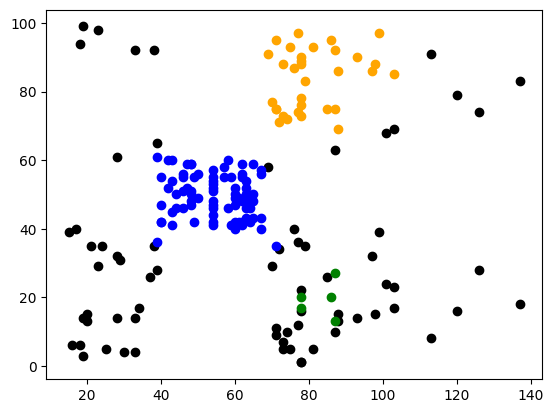

In [145]:
plt.scatter(non_cluster['Annual Income (k$)'],non_cluster['Spending Score (1-100)'],color='black',label='noissy point')
plt.scatter(cluster1['Annual Income (k$)'],cluster1['Spending Score (1-100)'],color='blue',label='cluster1')
plt.scatter(cluster2['Annual Income (k$)'],cluster2['Spending Score (1-100)'],color='orange',label='cluster2')
plt.scatter(cluster3['Annual Income (k$)'],cluster3['Spending Score (1-100)'],color='green',label='cluster3')

**choosing eps value based on my problem**

In [152]:
for i in range(1,30):
    db = DBSCAN(eps = i , min_samples = 5 , metric = 'euclidean',n_jobs=-1)
    labels = db.fit_predict(x)
    x['clusters'] = labels
    print(x['clusters'].unique())
    print('episolon : ',i)
    print(x['clusters'].value_counts())
    print('\n\n')

[-1]
episolon :  1
-1    200
Name: clusters, dtype: int64



[-1]
episolon :  2
-1    200
Name: clusters, dtype: int64



[-1]
episolon :  3
-1    200
Name: clusters, dtype: int64



[-1]
episolon :  4
-1    200
Name: clusters, dtype: int64



[-1  0  1  2  3]
episolon :  5
-1    179
 2      6
 0      5
 1      5
 3      5
Name: clusters, dtype: int64



[-1  0  1  2  3  4  5]
episolon :  6
-1    155
 2     13
 5      8
 3      7
 0      6
 4      6
 1      5
Name: clusters, dtype: int64



[-1  0  1  2  4  3  5  6  7]
episolon :  7
-1    137
 3     14
 4     10
 2      9
 7      8
 0      6
 6      6
 1      5
 5      5
Name: clusters, dtype: int64



[-1  0  1  2  3  4  5]
episolon :  8
-1    127
 1     17
 3     17
 5     14
 2     11
 0      9
 4      5
Name: clusters, dtype: int64



[-1  0  2  1  3  4  5  6]
episolon :  9
-1    89
 2    42
 5    21
 3    18
 0     9
 1     9
 4     7
 6     5
Name: clusters, dtype: int64



[-1  0  1  2  3]
episolon :  10
 1    79
-1    75
 2    

**choosing min_sample value based on my problem**

In [154]:
for i in range(1,30):
    db = DBSCAN(eps = 13 , min_samples = i , metric = 'euclidean',n_jobs=-1)
    labels = db.fit_predict(x)
    x['clusters'] = labels
    print(x['clusters'].unique())
    print('Minimum samples : ',i)
    print(x['clusters'].value_counts())
    print('\n\n')

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]
Minimum samples :  1
0     146
6      34
7       4
2       2
4       2
8       2
11      2
1       1
3       1
5       1
9       1
10      1
12      1
13      1
14      1
Name: clusters, dtype: int64



[ 0 -1  1  2  3  4  5  6]
Minimum samples :  2
 0    146
 3     34
-1      8
 4      4
 1      2
 2      2
 5      2
 6      2
Name: clusters, dtype: int64



[ 0 -1  1  2]
Minimum samples :  3
 0    146
 1     34
-1     16
 2      4
Name: clusters, dtype: int64



[ 0 -1  1  2  3]
Minimum samples :  4
 0    137
 2     34
-1     17
 1      8
 3      4
Name: clusters, dtype: int64



[-1  0  1  2]
Minimum samples :  5
 0    131
 2     34
-1     28
 1      7
Name: clusters, dtype: int64



[-1  0  1  2  3]
Minimum samples :  6
 0    107
-1     34
 2     33
 3     20
 1      6
Name: clusters, dtype: int64



[-1  0  1  2  3]
Minimum samples :  7
 0    101
-1     45
 2     33
 3     15
 1      6
Name: clusters, dtype: int64



[-1  0  1  2]
Min

In [167]:
db = DBSCAN(eps = 13 , min_samples = 5 , metric = 'euclidean',n_jobs=-1)
labels = db.fit_predict(x)
x['clusters'] = labels
print(x['clusters'].unique())
print('episolon : ',i)
print(x['clusters'].value_counts())
print('\n\n')

[-1  0  1  2]
episolon :  29
 0    129
 2     34
-1     30
 1      7
Name: clusters, dtype: int64





In [168]:
non_cluster = x[x['clusters']==-1]
cluster1 = x[x['clusters']==0]
cluster2 = x[x['clusters']==1]
cluster3 = x[x['clusters']==2]

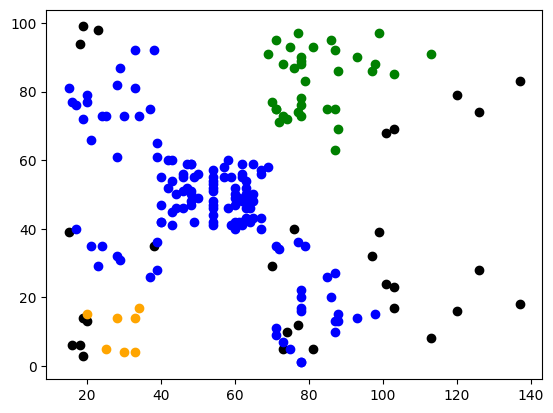

In [169]:
plt.scatter(non_cluster['Annual Income (k$)'],non_cluster['Spending Score (1-100)'],color='black',label='noissy point')
plt.scatter(cluster1['Annual Income (k$)'],cluster1['Spending Score (1-100)'],color='blue',label='cluster1')
plt.scatter(cluster2['Annual Income (k$)'],cluster2['Spending Score (1-100)'],color='orange',label='cluster2')
plt.scatter(cluster3['Annual Income (k$)'],cluster3['Spending Score (1-100)'],color='green',label='cluster3')